**DATA ANALYSIS**

Для начала я создам нужные мне датафреймы данных

In [91]:
import pandas as pd

migration = pd.read_excel('Data Set.xls')
migration.drop(index=range(3), inplace=True)
migration.drop(migration.columns[16:], axis = 'columns', inplace=True)

migration.loc[0:7].fillna('', inplace=True)

lv2 = ['Unnamed: 2', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 10', 'Unnamed: 12', 'Unnamed: 15']
lv3 = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 13', 'Unnamed: 14']

# сгенерил столбцовые имена заново нормально
migration.loc[3, ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']] = "Прибывшие "
migration.loc[3, ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']] = "Убывшие "

migration.loc[3, ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']] += migration.loc[3, 'Unnamed: 2']
migration.loc[3, ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']] += migration.loc[3, 'Unnamed: 7']
migration.loc[3, ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15']] += migration.loc[3, 'Unnamed: 12']

migration.loc[3, 'Unnamed: 2'] = "Прибывшие " + migration.loc[3, 'Unnamed: 2']
migration.loc[3, 'Unnamed: 7'] = "Убывшие " + migration.loc[3, 'Unnamed: 7']

migration.loc[3, lv2] += " " + migration.loc[4, lv2]
migration.loc[3, lv3[::2]] += " " + migration.loc[4, lv3[::2]]
migration.loc[3, lv3] += " " + migration.loc[5, lv3]

migration.columns = migration.loc[3].values
migration.drop(index=range(3, 7), inplace=True)
migration.index = range(len(migration))
# display(migration)

# отсюда берем уже индексы, по которым будем делить статистику
start_city, start_countryside = migration[migration.isna().any(axis=1)].index
migration.drop([start_city, start_countryside], axis='index', inplace=True)
# print(start_city, start_countryside)

migration_total = migration[:start_city]
migration_city = migration[start_city:start_countryside-1].reset_index(drop=True)
migration_countryside = migration[start_countryside-1:].reset_index(drop=True)
# display(migration_total, migration_city, migration_countryside)

/tmp/ipykernel_46824/1705527352.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  migration.loc[0:7].fillna('', inplace=True)


<Axes: title={'center': 'Миграция по всей стране'}, xlabel='Годы', ylabel='Человек'>

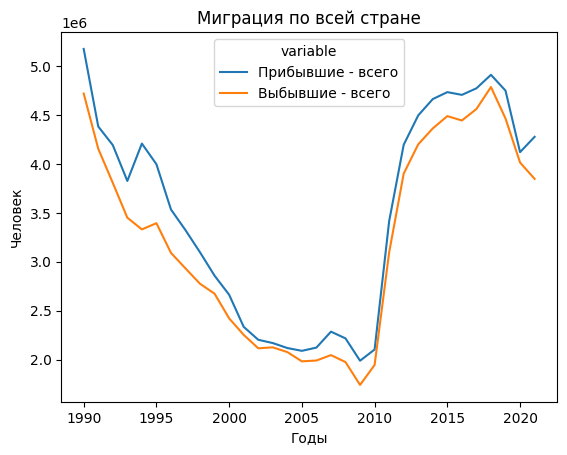

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Миграция по всей стране")
plt.ylabel("Человек")
sns.lineplot(data = pd.melt(migration_total[['Прибывшие - всего', 'Выбывшие - всего', 'Годы']], 'Годы'), x = 'Годы', y = 'value', hue = 'variable')

Наиболее малая разница между прибывшими и убывшими была в начале 1990ых, начале 2010 и 2019 году, отдельный график разности приведен ниже

<Axes: xlabel='Годы', ylabel='Миграци-онный прирост - всего'>

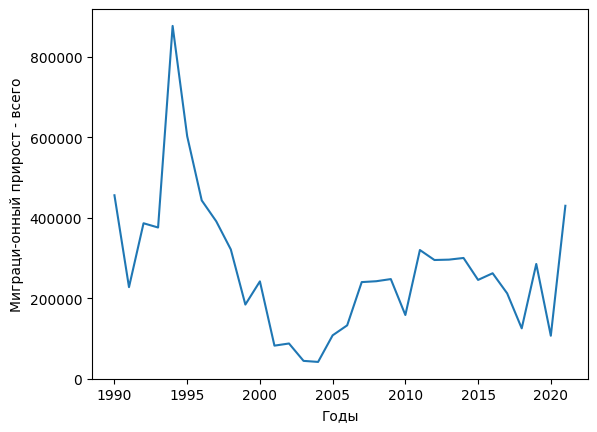

In [34]:
sns.lineplot(data = migration_total, x = 'Годы', y = 'Миграци-онный прирост - всего')

<Axes: title={'center': 'Миграция в городах'}, xlabel='Годы', ylabel='Человек'>

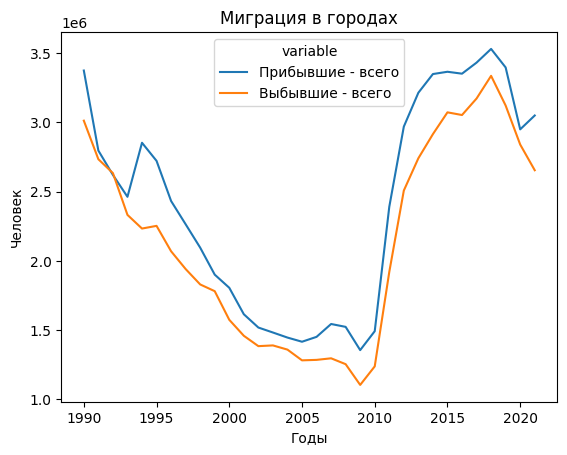

In [30]:
plt.title("Миграция в городах")
plt.ylabel("Человек")
sns.lineplot(data = pd.melt(migration_city[['Прибывшие - всего', 'Выбывшие - всего', 'Годы']], 'Годы'), x = 'Годы', y = 'value', hue = 'variable')

Если рассматривать города в отдельности, то можно заметить, что в них отмеченная динамика проявляется еще ярче, был даже период, где поток выбывших людей был выше потока убывших, т.е. график, представленный ниже, в ранних 1990ых опустился ниже 0

Стоит отметить, что судя по виду графика, подразумевается комбинация приезжающих из деревень и из-за границы и уезжающих за границу и в деревни из городов

<Axes: xlabel='Годы', ylabel='Миграци-онный прирост - всего'>

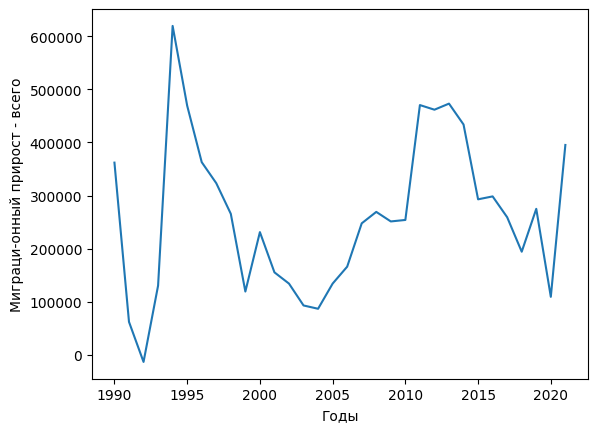

In [35]:
sns.lineplot(data = migration_city, x = 'Годы', y = 'Миграци-онный прирост - всего')

<Axes: title={'center': 'Миграция в деревнях'}, xlabel='Годы', ylabel='Человек'>

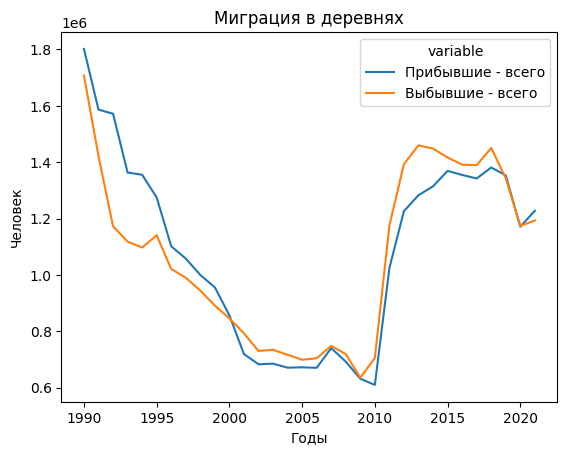

In [32]:
plt.title("Миграция в деревнях")
plt.ylabel("Человек")
sns.lineplot(data = pd.melt(migration_countryside[['Прибывшие - всего', 'Выбывшие - всего', 'Годы']], 'Годы'), x = 'Годы', y = 'value', hue = 'variable')

В деревнях статистика крайне отлична: из-за урбанизации начиная с ~2000 года уезжающих из деревни всегда превышало количество приезжающих

<Axes: xlabel='Годы', ylabel='Миграци-онный прирост - всего'>

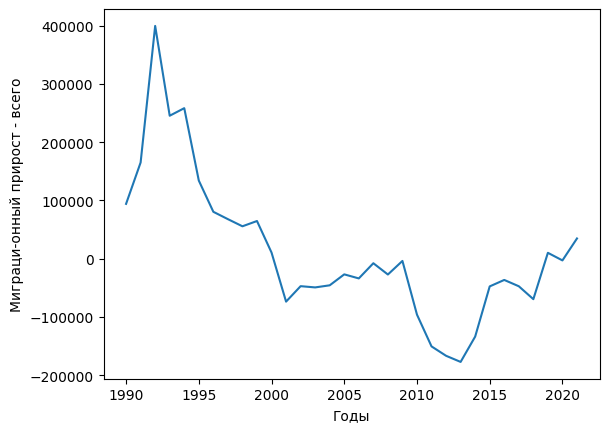

In [37]:
sns.lineplot(data = migration_countryside, x = 'Годы', y = 'Миграци-онный прирост - всего')

**Также стоит разбить все эти показатели на составляющие:**

In [110]:
display(migration_total.head(0))

,Годы,Прибывшие - всего,Прибывшие из них в пределах России,Прибывшие из них в том числе внутри регионов,Прибывшие из них из других регионов,Прибывшие из них из зарубеж-ных стран,Выбывшие - всего,Убывшие из них в пределах России,Убывшие из них в том числе внутри регионов,Убывшие из них в другие регионы,Убывшие из них в зарубежные страны,Миграци-онный прирост - всего,из него в результате передви-жений в пределах России,из него в результате в том числе внутри регионов,из него в результате между регионами,из него в результате миграционного обмена населением с зарубежными странами


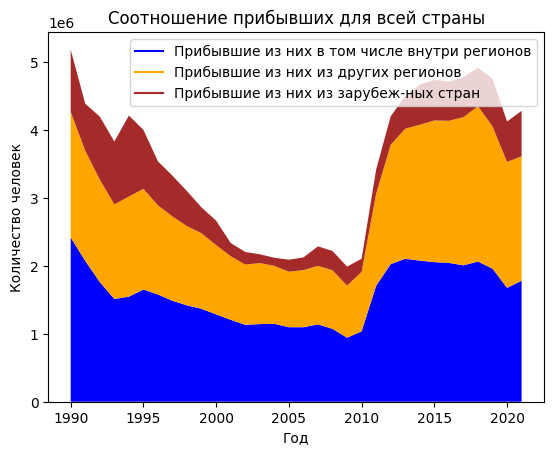

In [153]:
Years = migration_total['Годы'].values.astype(int)
In_regions = migration_total['Прибывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_total['Прибывшие из них из других регионов'].values.astype(int)
ToCountries = migration_total['Прибывшие из них из зарубеж-ных стран'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Прибывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Прибывшие из них из других регионов')
plt.plot([], [], color ='brown',
         label ='Прибывшие из них из зарубеж-ных стран')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение прибывших для всей страны')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

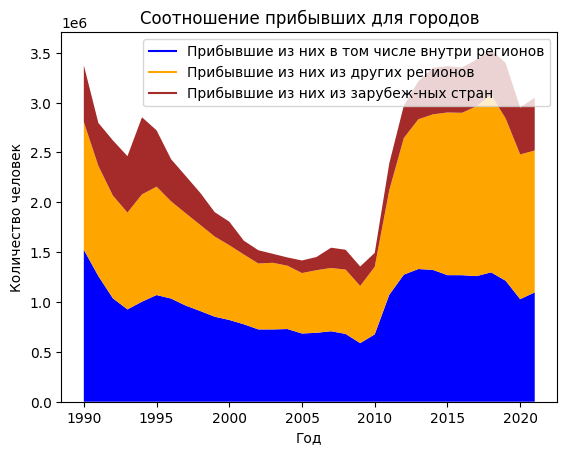

In [152]:
Years = migration_city['Годы'].values.astype(int)
In_regions = migration_city['Прибывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_city['Прибывшие из них из других регионов'].values.astype(int)
ToCountries = migration_city['Прибывшие из них из зарубеж-ных стран'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Прибывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Прибывшие из них из других регионов')
plt.plot([], [], color ='brown',
         label ='Прибывшие из них из зарубеж-ных стран')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение прибывших для городов')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

Для городов статистика не особо отличается от общероссийской

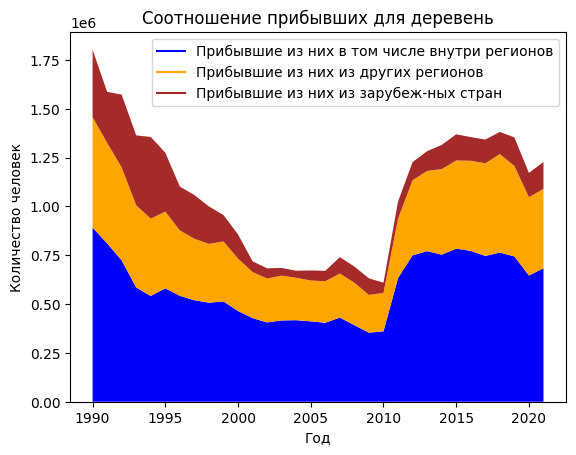

In [154]:
Years = migration_countryside['Годы'].values.astype(int)
In_regions = migration_countryside['Прибывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_countryside['Прибывшие из них из других регионов'].values.astype(int)
ToCountries = migration_countryside['Прибывшие из них из зарубеж-ных стран'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Прибывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Прибывшие из них из других регионов')
plt.plot([], [], color ='brown',
         label ='Прибывшие из них из зарубеж-ных стран')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение прибывших для деревень')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

В деревнях, как видно по графику, общий объем приезжающих куда меньше с 2000ых, особенно из зарубежных стран

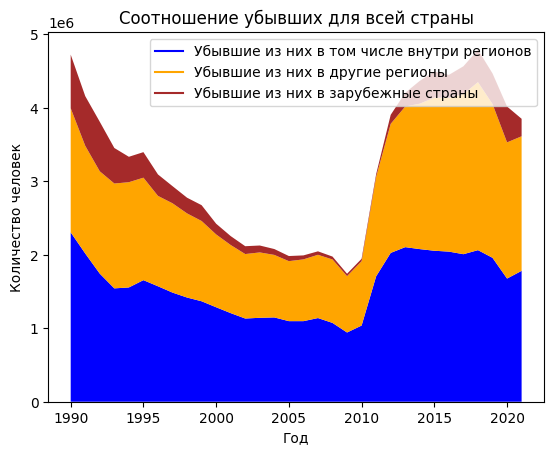

In [158]:
Years = migration_total['Годы'].values.astype(int)
In_regions = migration_total['Убывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_total['Убывшие из них в другие регионы'].values.astype(int)
ToCountries = migration_total['Убывшие из них в зарубежные страны'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Убывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Убывшие из них в другие регионы')
plt.plot([], [], color ='brown',
         label ='Убывшие из них в зарубежные страны')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение убывших для всей страны')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

С 2011 года резко падают темпы миграции заграницу, но крайне быстро нарастают передвижения внутри страны

Темпы эмиграции востановились ближе к 2015 году

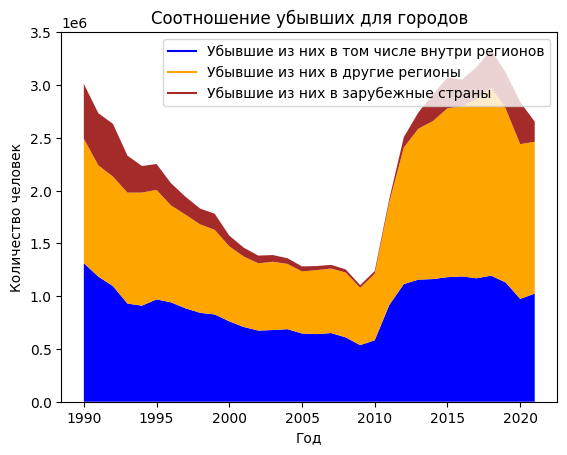

In [159]:
Years = migration_city['Годы'].values.astype(int)
In_regions = migration_city['Убывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_city['Убывшие из них в другие регионы'].values.astype(int)
ToCountries = migration_city['Убывшие из них в зарубежные страны'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Убывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Убывшие из них в другие регионы')
plt.plot([], [], color ='brown',
         label ='Убывшие из них в зарубежные страны')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение убывших для городов')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

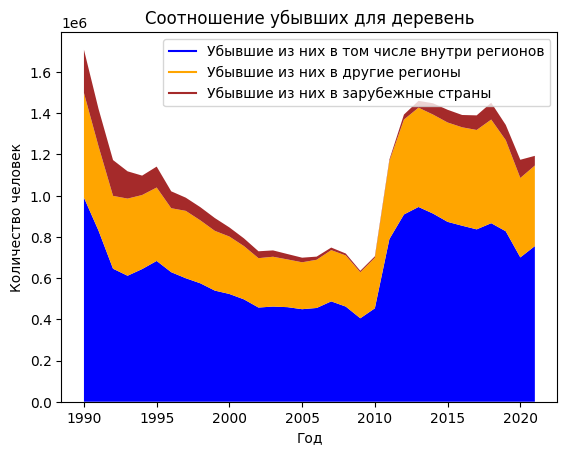

In [160]:
Years = migration_countryside['Годы'].values.astype(int)
In_regions = migration_countryside['Убывшие из них в том числе внутри регионов'].values.astype(int)
To_regions = migration_countryside['Убывшие из них в другие регионы'].values.astype(int)
ToCountries = migration_countryside['Убывшие из них в зарубежные страны'].values.astype(int)

# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Убывшие из них в том числе внутри регионов')
plt.plot([], [], color ='orange',
         label ='Убывшие из них в другие регионы')
plt.plot([], [], color ='brown',
         label ='Убывшие из них в зарубежные страны')
 
# Implementing stackplot on data
plt.stackplot(Years, In_regions, To_regions, ToCountries, 
              baseline ='zero', 
              colors =['blue', 'orange', 'brown'])
 
plt.legend()
 
plt.title('Соотношение убывших для деревень')
plt.ylabel('Количество человек')
plt.xlabel('Год')
 
plt.show()

Ключевое отличие распределения миграции из деревень - оттуда практически не ездят за границу

Остается последний параметр приведенных данных - миграционный прирост

In [163]:
display(migration_total.head(0))

,Годы,Прибывшие - всего,Прибывшие из них в пределах России,Прибывшие из них в том числе внутри регионов,Прибывшие из них из других регионов,Прибывшие из них из зарубеж-ных стран,Выбывшие - всего,Убывшие из них в пределах России,Убывшие из них в том числе внутри регионов,Убывшие из них в другие регионы,Убывшие из них в зарубежные страны,Миграци-онный прирост - всего,из него в результате передви-жений в пределах России,из него в результате в том числе внутри регионов,из него в результате между регионами,из него в результате миграционного обмена населением с зарубежными странами


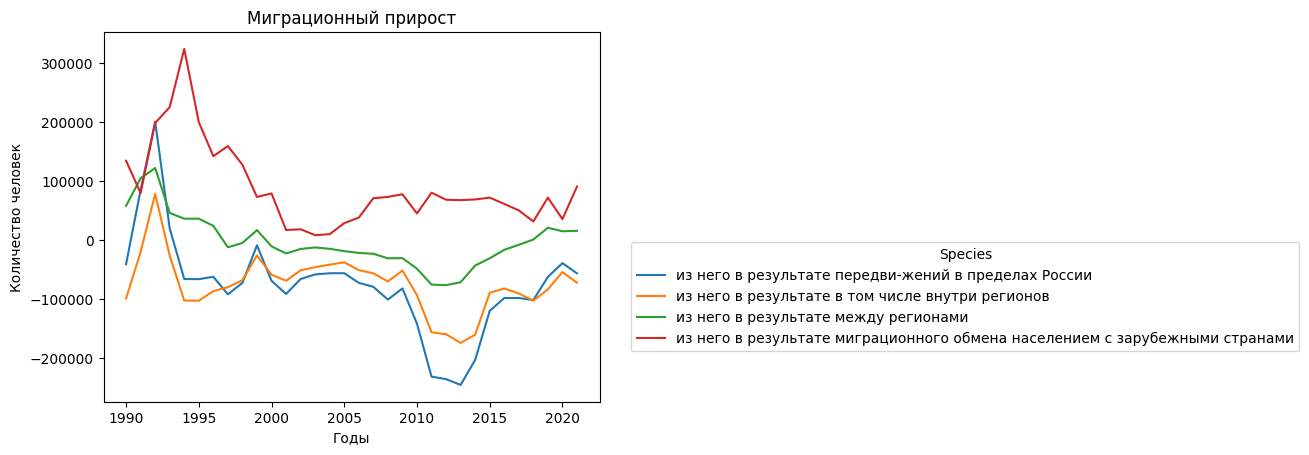

In [174]:
plt.title("Миграционный прирост")
plt.ylabel("Количество человек")
g = sns.lineplot(data = pd.melt(migration_countryside[['из него в результате передви-жений в пределах России', 'из него в результате в том числе внутри регионов', "из него в результате между регионами", "из него в результате миграционного обмена населением с зарубежными странами",  'Годы']], 'Годы'), x = 'Годы', y = 'value', hue = 'variable')
sns.move_legend(g, "upper left", bbox_to_anchor=(1.05, .45), title='Species')

Ну и продемонстрируем в какой суммарный прирост будут собираться эти параметры

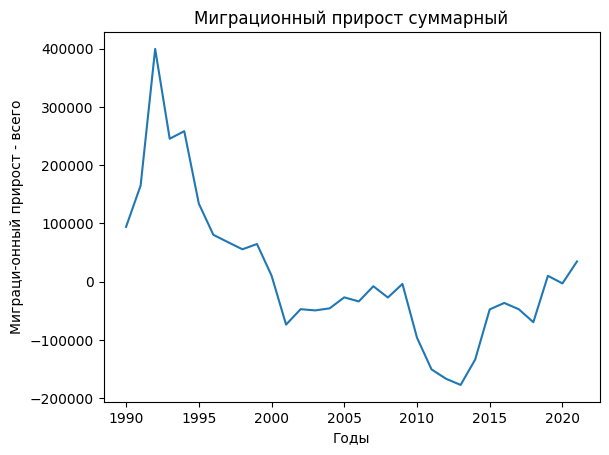

In [176]:
plt.title("Миграционный прирост суммарный")
g = sns.lineplot(data = migration_countryside, x = 'Годы', y = 'Миграци-онный прирост - всего')

**Примеры на питоне**

In [14]:
def left_half_bigger(l : list) -> bool:
    mid = len(l) // 2
    
    # print(l[:mid], l[mid + int(len(l) & 1):])
    return sum(l[:mid]) > sum(l[mid + int(len(l) & 1):])

left_half_bigger([2, 1])

[2] [1]


True

In [26]:
names = []
ages = []
# [['Alexey', 23], ['Inna', 26], ['Alex', 39], ['Jane', 37], ['Olga', 42]] as input
list = "".join(filter(lambda x: x not in ('[', ']', '\'', ','), input())).split(" ")
names = list[::2]
ages = list[1::2]

while True:
    cmd = input("Enter the order of output: Ages or Names")
    if cmd == "Ages":
        print(sorted(ages))
        break
    elif cmd == "Names":
        print(sorted(names))
        break
    else: print("Wrong command")

['23', '26', '37', '39', '42']
